Lenguaje      0
Porcentaje    0
dtype: int64

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -2547.77
- El intercepto del modelo es: 52813.00

Interpretación del comportamiento:
- Los lenguajes de programación con mayor popularidad tienden a tener un salario proporcional más alto. Esto es evidente en el gráfico, donde los lenguajes más populares como JavaScript, HTML/CSS y SQL ocupan las posiciones más altas del ranking y tienen los valores de salario más altos.
- A medida que descendemos en el ranking de popularidad, los salarios proporcionales disminuyen. Lenguajes como Rust, Elixir y Clojure están en las posiciones más bajas debido a su menor adopción en el mercado laboral.
- El modelo de regresión lineal muestra una relación negativa, lo que indica que a medida que el ranking disminuye (menos popularidad), el salario proporcional también disminuye.
- Esto sugiere que la popularidad de un lenguaje tiene una correlación directa con su demanda en 

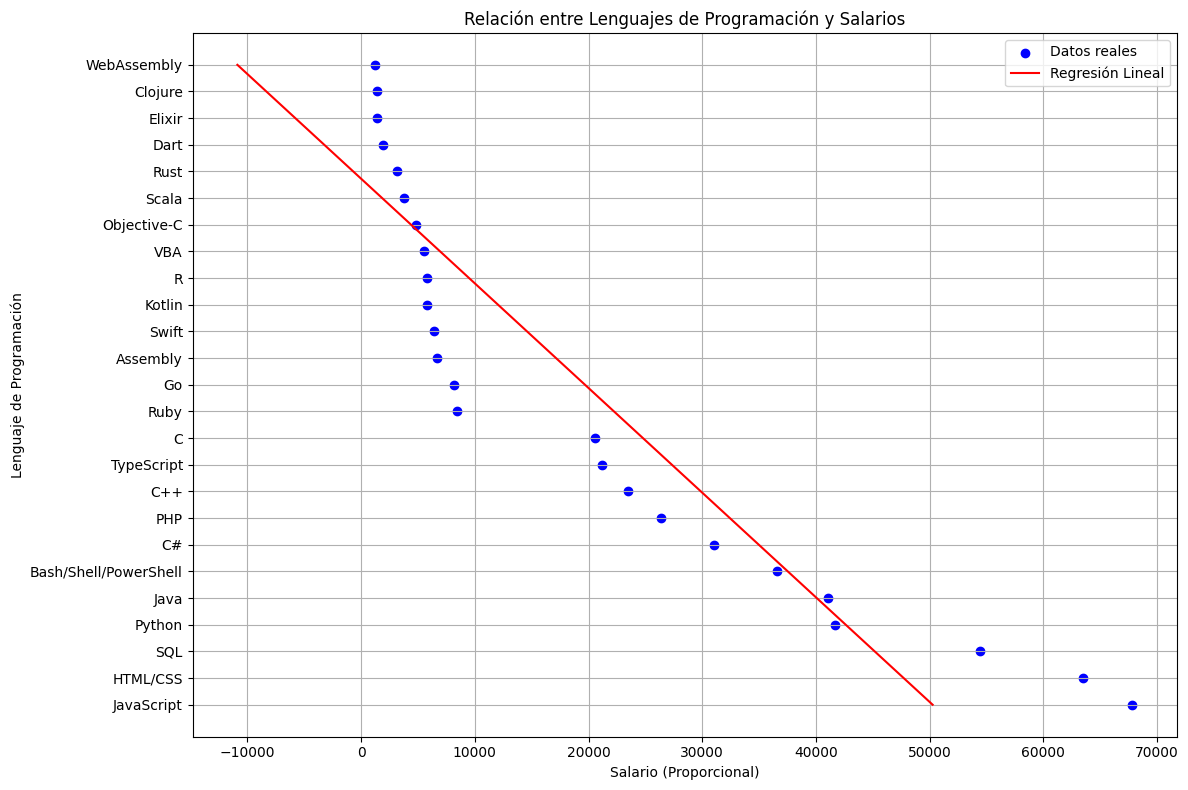

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV
archivo_csv = "Lenguajes.csv"
df = pd.read_csv(archivo_csv)

# Verificar si hay valores NaN en las columnas
print(df.isnull().sum())

# Generar una columna ficticia de salarios basada en el porcentaje (solo como ejemplo)
df['Salario'] = df['Porcentaje'] * 1000

# Ordenar por salario y resetear el índice
df = df.sort_values(by="Salario", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Salario"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo y generar un análisis textual
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print("- Los lenguajes de programación con mayor popularidad tienden a tener un salario proporcional más alto. Esto es evidente en el gráfico, donde los lenguajes más populares como JavaScript, HTML/CSS y SQL ocupan las posiciones más altas del ranking y tienen los valores de salario más altos.")
print("- A medida que descendemos en el ranking de popularidad, los salarios proporcionales disminuyen. Lenguajes como Rust, Elixir y Clojure están en las posiciones más bajas debido a su menor adopción en el mercado laboral.")
print("- El modelo de regresión lineal muestra una relación negativa, lo que indica que a medida que el ranking disminuye (menos popularidad), el salario proporcional también disminuye.")
print("- Esto sugiere que la popularidad de un lenguaje tiene una correlación directa con su demanda en el mercado, y por ende, con los salarios que se pagan por su conocimiento.")

# Configurar el gráfico con los nombres de los lenguajes en el eje y
plt.figure(figsize=(12, 8))
plt.scatter(df["Salario"], df["Lenguaje"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Lenguaje"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Salario (Proporcional)")
plt.ylabel("Lenguaje de Programación")
plt.title("Relación entre Lenguajes de Programación y Salarios")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()